In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch, os
import shap
from PersonaClassifier import DataProcessor, MLP, BiLSTMClassifier, My_training_class, logging
import PersonaClassifier
from datetime import datetime
shap.initjs()
PersonaClassifier.timestamp = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
PersonaClassifier.ckpt = f"checkpoint/test"
if not os.path.exists(PersonaClassifier.ckpt ):
    os.makedirs(PersonaClassifier.ckpt )
logging.basicConfig(filename=f'{PersonaClassifier.ckpt }/log_{PersonaClassifier.timestamp}.log', level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')


In [12]:
filepath = 'data/pandora_processed_train.csv'
my_train = My_training_class( filepath, model_list=['lr'], embedding_model=None, demo=True, kFold=False)
my_train.preprocess_data(filepath, None, False, True)

In [13]:
for target_col in ['cOPN', 'cCON', 'cEXT', 'cAGR', 'cNEU']:
    my_train.prepare_dataset(target_col, test_size=0.1)
    my_train.init_models()
    my_train.fit_and_save_models(target_col)
    my_train.validate_and_generate_acc_scr(target_col)

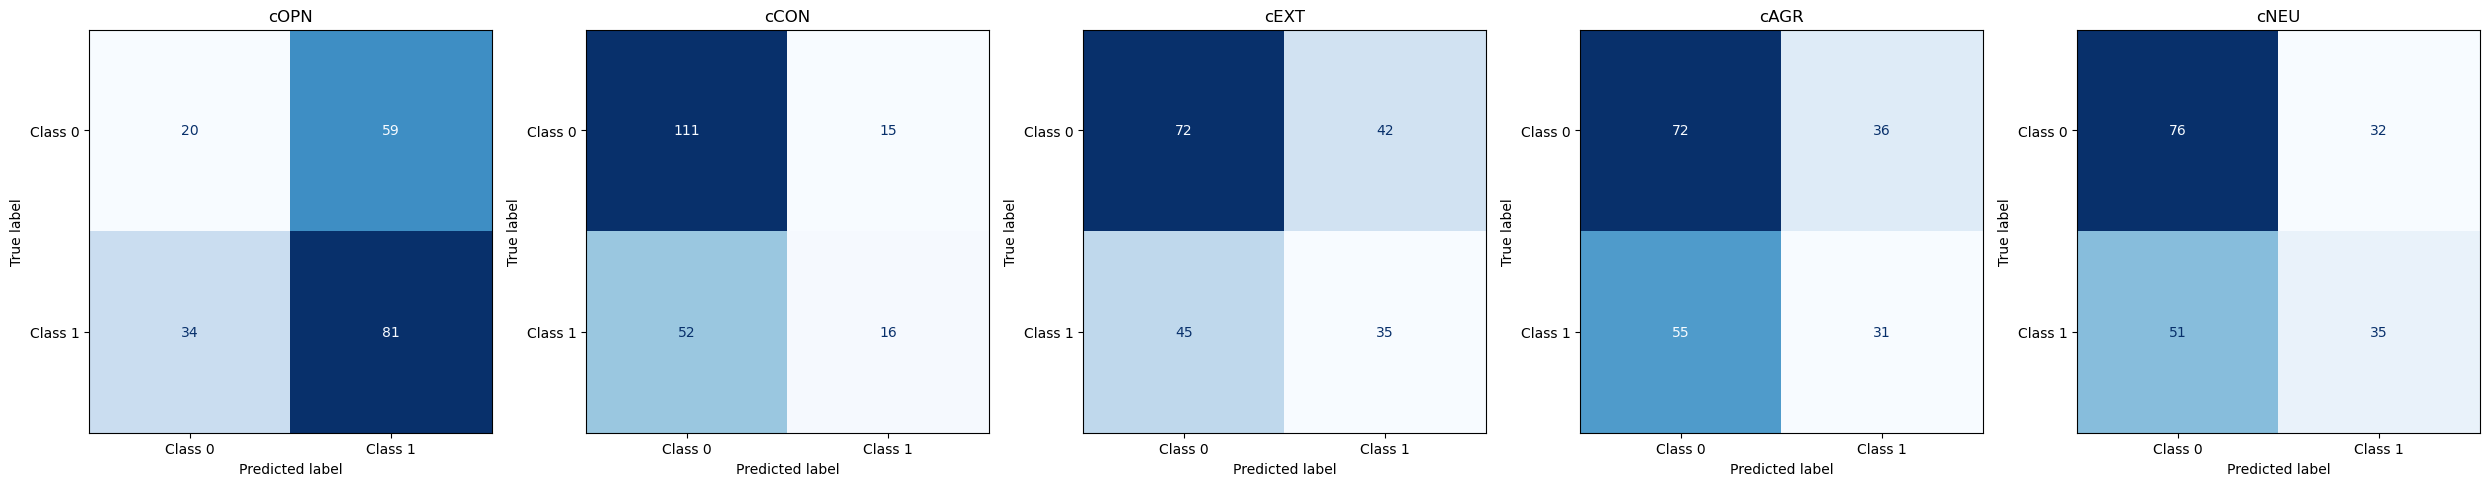

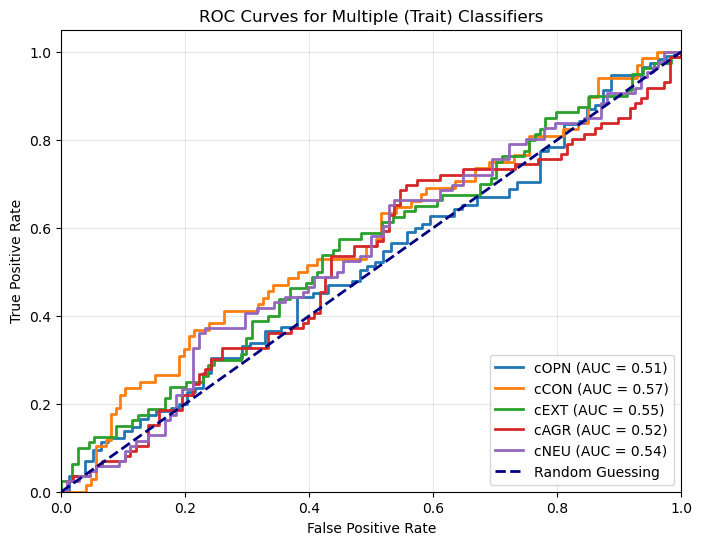

In [14]:
my_train.display_metrics(False)
my_train.generate_auroc(False)

In [15]:
my_train.explain_SHAP(False)

TypeError: My_training_class.explain_SHAP() takes 0 positional arguments but 2 were given